In [44]:
#Importing necessary libraries for dataframe manipulation
import pandas as pd
import numpy as np

In [45]:
#Importing necessary libraries for plottings
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
#Importing the Uber Request Data csv file
u_r_d = pd.read_csv("Uber Request Data.csv")

In [47]:
#Printing the first 5 records of the csv file using head()
u_r_d.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [48]:
#Checking for duplicates in the Request id column
request_id = u_r_d["Request id"]
u_r_d[request_id.isin(request_id[request_id.duplicated()])].sort_values("Request id")
#Since the output is empty, it means that there are no duplicate Request ids in the provided dataset.

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp


In [49]:
#Checking for null vaues in Request id, Pickup point, Status and Request timestamp columns
u_r_d[["Request id","Pickup point","Status","Request timestamp"]].isnull().sum().sum()
#We observe that there are no null or empty values in any of the above columns

0

In [50]:
#Extracting a new column and replacing "/" by "-" for easier segregation to slots for Request timestamp column
u_r_d['Request timestamp dateformat'] = u_r_d['Request timestamp'].str.replace("/","-")
u_r_d.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp dateformat
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,11-7-2016 11:51
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,11-7-2016 17:57
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,12-7-2016 9:17
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,12-7-2016 21:08
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,13-07-2016 08:33:16


In [51]:
#Extracting a new column and replacing "/" by "-" for easier segregation to slots for Drop timestamp column
u_r_d['Drop timestamp dateformat'] = u_r_d['Drop timestamp'].str.replace("/","-")
u_r_d.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp dateformat,Drop timestamp dateformat
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,11-7-2016 11:51,11-7-2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,11-7-2016 17:57,11-7-2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,12-7-2016 9:17,12-7-2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,12-7-2016 21:08,12-7-2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,13-07-2016 08:33:16,13-07-2016 09:25:47


In [52]:
#Changing the timestamp of both the columns to datetime for uniformity and data cleaning using to_datetime()
u_r_d['Drop timestamp dateformat'] =  pd.to_datetime(u_r_d['Drop timestamp dateformat'])
u_r_d['Request timestamp dateformat'] =  pd.to_datetime(u_r_d['Request timestamp dateformat'])
u_r_d.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp dateformat,Drop timestamp dateformat
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47


In [53]:
#Extracting two new columns for hour and day of the trips 
u_r_d['Request timestamp hour'] = u_r_d['Request timestamp dateformat'].dt.hour
u_r_d['Request timestamp day'] = u_r_d['Request timestamp dateformat'].dt.day
u_r_d['Request timestamp date'] = u_r_d['Request timestamp dateformat'].dt.date
u_r_d.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp dateformat,Drop timestamp dateformat,Request timestamp hour,Request timestamp day,Request timestamp date
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,2016-11-07
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,2016-11-07
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,2016-12-07
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,2016-12-07
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,2016-07-13


In [54]:
#Extracting a new column depicting the slot of time of all the individual trips
u_r_d['Time_slots'] = pd.cut(u_r_d['Request timestamp hour'],[0,4,8,12,16,20,24],labels=['Late Night','Early Morning','Morning','Afternoon','Evening','Night'])
u_r_d

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp dateformat,Drop timestamp dateformat,Request timestamp hour,Request timestamp day,Request timestamp date,Time_slots
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,2016-11-07,Morning
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,2016-11-07,Evening
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,2016-12-07,Morning
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,2016-12-07,Night
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,2016-07-13,Early Morning
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59,2016-07-13 21:57:28,2016-07-13 22:28:59,21,13,2016-07-13,Night
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,2016-07-14,Early Morning
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,2016-07-15,Early Morning
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51,2016-07-15 17:57:27,2016-07-15 18:50:51,17,15,2016-07-15,Evening
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25,2016-11-07 06:46:00,2016-11-07 07:25:00,6,7,2016-11-07,Early Morning


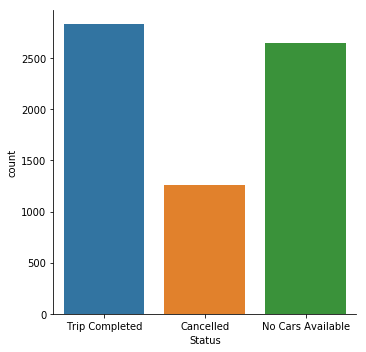

In [55]:
# Plot the count of trips which were completed or cancelled or when no cars were available
# Catplot has been used for the better understanding inthis as compare to countplots
# This is better for overall analysis
sns.catplot(x="Status", kind="count", data=u_r_d);
plt.show()

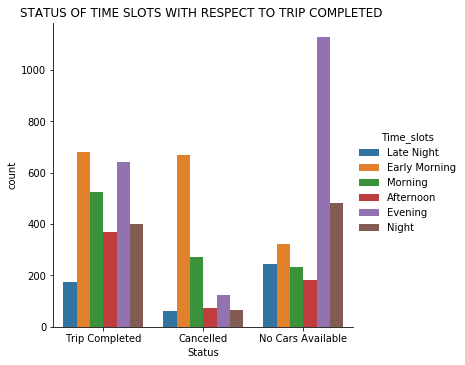

In [56]:
#Plot of Status of timeslots with respect to trip compared
#Catplot has been used for the better understanding inthis as compare to countplots
#This is better for overall analysis
sns.catplot(x="Status",hue="Time_slots",kind="count", data = u_r_d);
plt.title("STATUS OF TIME SLOTS WITH RESPECT TO TRIP COMPLETED ")
plt.show()

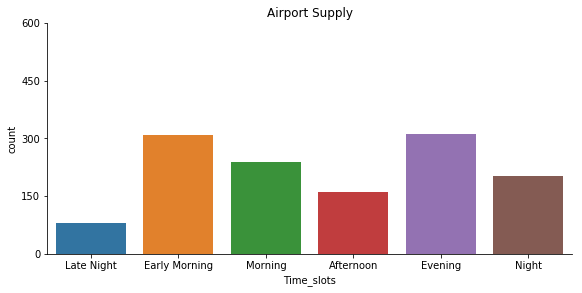

In [57]:
#Plot graph of slotwise count of trips which are completed (Supply) from Airport to City 
#Catplot has been used for the better understanding inthis as compare to countplots
#This is better for overall analysis
sns.catplot(x="Time_slots", data=u_r_d[(u_r_d['Pickup point']=='Airport')&(u_r_d['Status']=='Trip Completed')],kind='count',height=4,aspect=2)
plt.title("Airport Supply")
plt.yticks([0,150,300,450,600])
plt.show()


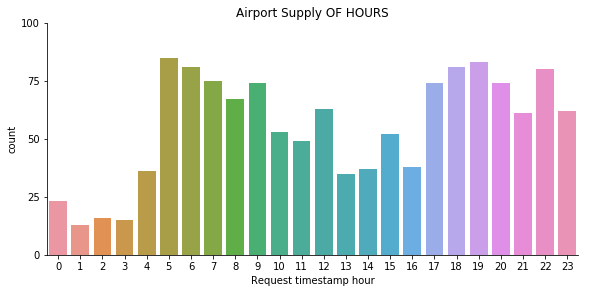

In [58]:
#Plot the hourwise count of trips which are completed (Supply) from  City to Airport
#Catplot has been used for the better understanding inthis as compare to countplots
#This is better for overall analysis
sns.catplot(x="Request timestamp hour", data=u_r_d[(u_r_d['Pickup point']=='Airport')&(u_r_d['Status']=='Trip Completed')],kind='count',height=4,aspect=2)
plt.title("Airport Supply OF HOURS")
plt.yticks([0,25,50,75,100])
plt.show()


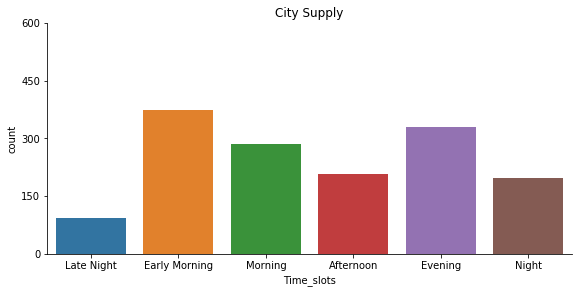

In [59]:
#Plot graph of slotwise count of trips which are completed (Supply) from City to Airport 
#Catplot has been used for the better understanding inthis as compare to countplots
#This is better for overall analysis
sns.catplot(x="Time_slots", data=u_r_d[(u_r_d['Pickup point']=='City')&(u_r_d['Status']=='Trip Completed')],kind='count',height=4,aspect=2)
plt.title("City Supply")
plt.yticks([0,150,300,450,600])
plt.show()


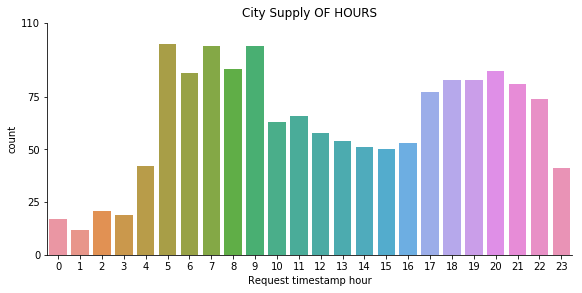

In [60]:
#Plot the hourwise count of trips which are completed (Supply) from Airport to City
#Catplot has been used for the better understanding inthis as compare to countplots
#This is better for overall analysis
sns.catplot(x="Request timestamp hour", data=u_r_d[(u_r_d['Pickup point']=='City')&(u_r_d['Status']=='Trip Completed')],kind='count',height=4,aspect=2)
plt.title("City Supply OF HOURS")
plt.yticks([0,25,50,75,110])
plt.show()

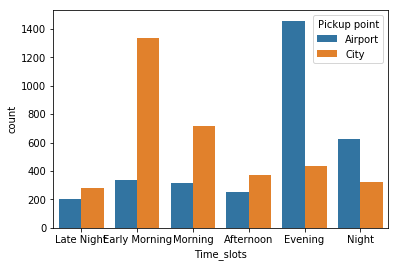

In [61]:
#Plot the demand of trips at city and airport with respect to time slots
#Catplot has been used for the better understanding inthis as compare to countplots
#This is better for overall analysis
sns.countplot(x="Time_slots" ,hue="Pickup point", data=u_r_d);

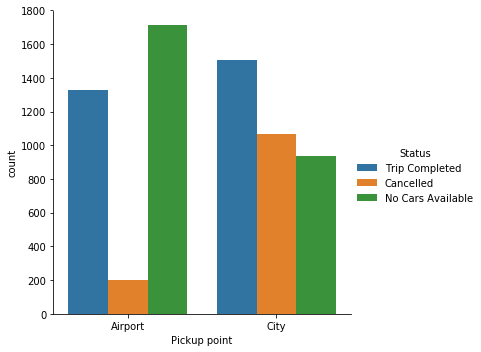

In [62]:
#Plot the count of trips which were completed or cancelled or when  no car were available when the pickup point was Airport or City 
#Catplot has been used for the better understanding inthis as compare to countplots
#This is better for overall analysis
sns.catplot(x="Pickup point",hue="Status",kind="count", data = u_r_d);
plt.show()

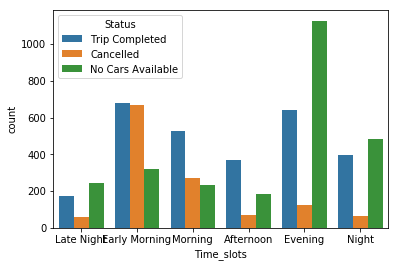

In [63]:
#Plot trips completed , cancelled and no cars available 
sns.countplot(x="Time_slots",hue="Status" ,data = u_r_d)


In [64]:
#We are creating df uber_g to calculate Gaps
uber_g = u_r_d.groupby(['Request timestamp date','Status'])['Request id'].count().reset_index()
uber_g.rename(columns={'Request id':'count'},inplace=True)
uber_g

,Request timestamp date,Status,count
0,2016-07-13,Cancelled,270
1,2016-07-13,No Cars Available,490
2,2016-07-13,Trip Completed,577
3,2016-07-14,Cancelled,252
4,2016-07-14,No Cars Available,571
5,2016-07-14,Trip Completed,530
6,2016-07-15,Cancelled,240
7,2016-07-15,No Cars Available,580
8,2016-07-15,Trip Completed,561
9,2016-11-07,Cancelled,262


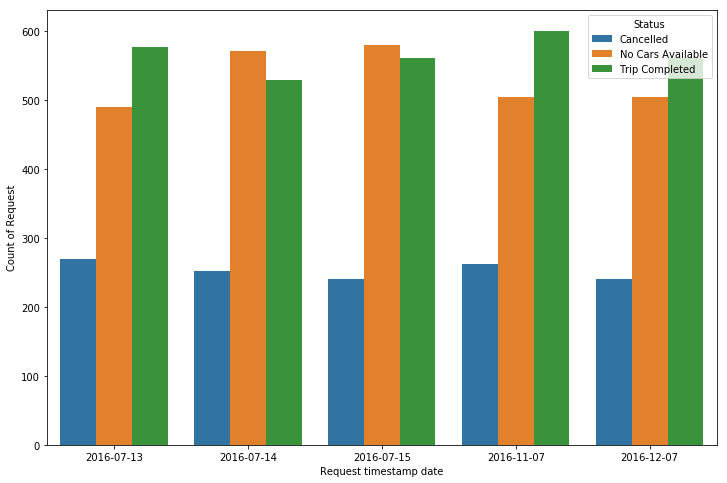

In [65]:
# In this graph we are ploting the number of cancelled request and number of ' no car available' request.
# We are using bar plots to the dta category in a frequency distribution 
fig , ax=plt.subplots(figsize=(12,8))
bar=sns.barplot(x=uber_g['Request timestamp date'],y=uber_g['count'],hue=uber_g['Status'],ax=ax)
#Write the code to set the label of y-axis
ax.set_ylabel("Count of Request")
plt.show()

In [66]:
#Making a new df of 'uber_s' calculating the total successfull trip which is know as Supply
uber_s=u_r_d.loc[u_r_d['Status']=="Trip Completed"].groupby("Time_slots",as_index=False)['Request id'].count().rename(columns={'Request id':'Supply'})
uber_s

,Time_slots,Supply
0,Late Night,174
1,Early Morning,681
2,Morning,525
3,Afternoon,370
4,Evening,642
5,Night,399


In [67]:
#Making a new df of 'uber_r' calculating the total request for the trips which is know as Demand
uber_d= u_r_d.groupby('Time_slots',as_index=False)['Request id'].count().rename(columns={'Request id':'Demand'})
uber_d

,Time_slots,Demand
0,Late Night,479
1,Early Morning,1672
2,Morning,1029
3,Afternoon,626
4,Evening,1893
5,Night,947


In [68]:
#Using the concet of join concatenating both Supply and Demand with repect to Time_slot
uber_s_d = pd.concat([uber_s.set_index('Time_slots'),uber_d.set_index('Time_slots')],axis=1,join='inner').reset_index()
uber_s_d


,Time_slots,Supply,Demand
0,Late Night,174,479
1,Early Morning,681,1672
2,Morning,525,1029
3,Afternoon,370,626
4,Evening,642,1893
5,Night,399,947


In [69]:
#Finding out the Gap
#Gap=Demand-Supply
uber_s_d['Gap']=uber_s_d['Demand']-uber_s_d['Supply']
uber_s_d

,Time_slots,Supply,Demand,Gap
0,Late Night,174,479,305
1,Early Morning,681,1672,991
2,Morning,525,1029,504
3,Afternoon,370,626,256
4,Evening,642,1893,1251
5,Night,399,947,548


In [70]:
#Converting it into csv for the graph in tableau
u_r_d.to_csv('u_r_d.csv')

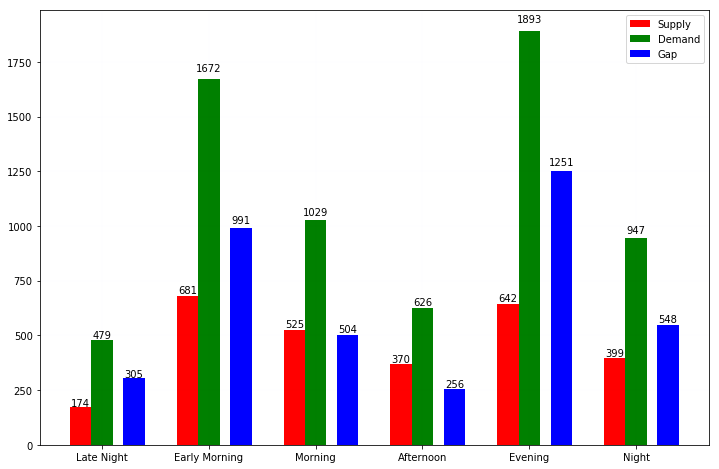

In [71]:
#Correlation of Supply,Demand and Gap attritubes
# The graph of the correlation
ind = np.arange(6)
# specfing the width of the bar plot
width = 0.20
fig, ax = plt.subplots(figsize=(12,8))
ax.grid(color='b', linestyle='-', linewidth=0.01)
#Specifying the width,color of the graph
#Showing the frequency distribution
#For the bar grapg for supply 
supply = uber_s_d['Supply'].values
rectas1 = ax.bar(ind, supply, width, color='r')
#For the bar grapg for demand
demand = uber_s_d['Demand'].values
rectas2 = ax.bar(ind+width, demand, width, color='g')
#For the bar grapg for gap
gap    = uber_s_d['Gap'].values
rectas3 = ax.bar(ind + 2.5 * width, gap, width, color='b')
#Giving the frequency of each bar graph at the top to observe the highest gaps in the supply demand generally
ax.set_xticks(ind + 1*width)
ax.set_xticklabels(uber_s_d['Time_slots'])
ax.legend((rectas1[0], rectas2[0], rectas3[0]), ('Supply', 'Demand', 'Gap'))

for k in ax.patches:
    _x = k.get_x() + k.get_width() / 2
    _y = k.get_y() + k.get_height()*1.02
    value = k.get_height()
    ax.text(_x, _y, value,ha="center") 



plt.show()
